## **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

#### **TRAYENDO DATA**


In [25]:
import pandas as pd
import numpy as np
from scipy import stats

train=pd.read_csv("C:/Users/Rayzek/Documents/PROYECTOS/DATASETS/StudentsPerformance.csv",sep=",")


In [26]:
train.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### VIENDO VALORES ÚNICOS

In [27]:
columns=train.columns
for i in columns:
    print(train[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
# Verificar la presencia de valores faltantes
print("Valores faltantes: ", train.isna().sum().sum())

Valores faltantes:  0


FALTA PMF

#### ELIMINANDO NULOS Y 

In [30]:
train=train.dropna()

#### ONE HOT ENCODING DONDE HAY MUCHOS UNICOS

In [31]:
#encoded = pd.get_dummies(train["parental level of education"])

#train = train.join(encoded)

encoded = pd.get_dummies(train["race/ethnicity"])
train = train.join(encoded)

train=train.drop("race/ethnicity",axis=1)

#### LABEL ENCODER DONDE HAY POCOS UNICOS

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['gender'] = le.fit_transform(train['gender'].values)
train['test preparation course'] = le.fit_transform(train['test preparation course'].values)
train['parental level of education'] = le.fit_transform(train['parental level of education'].values)
train['lunch'] = le.fit_transform(train['lunch'].values)

In [33]:
train.describe()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000,0.089000,0.190000,0.319000,0.262000,0.140000
std,0.499926,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657,0.284886,0.392497,0.466322,0.439943,0.347161
min,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


for column in train.columns[:-1]:
    stat, p = stats.shapiro(train[column])
    if p < 0.05:
        print(f"La variable {column} no sigue una distribución normal (p = {p:.3f})")
    else:
        print(f"La variable {column} sigue una distribución normal (p = {p:.3f})")


for column in train.columns[:-1]:
    z_scores = zscore(train[column])
    outliers = np.where(np.abs(z_scores) > 3)
    train = train.drop(train.index[outliers[0]])
    print(f"Se eliminaron {len(outliers[0])} outliers en la variable {column}")

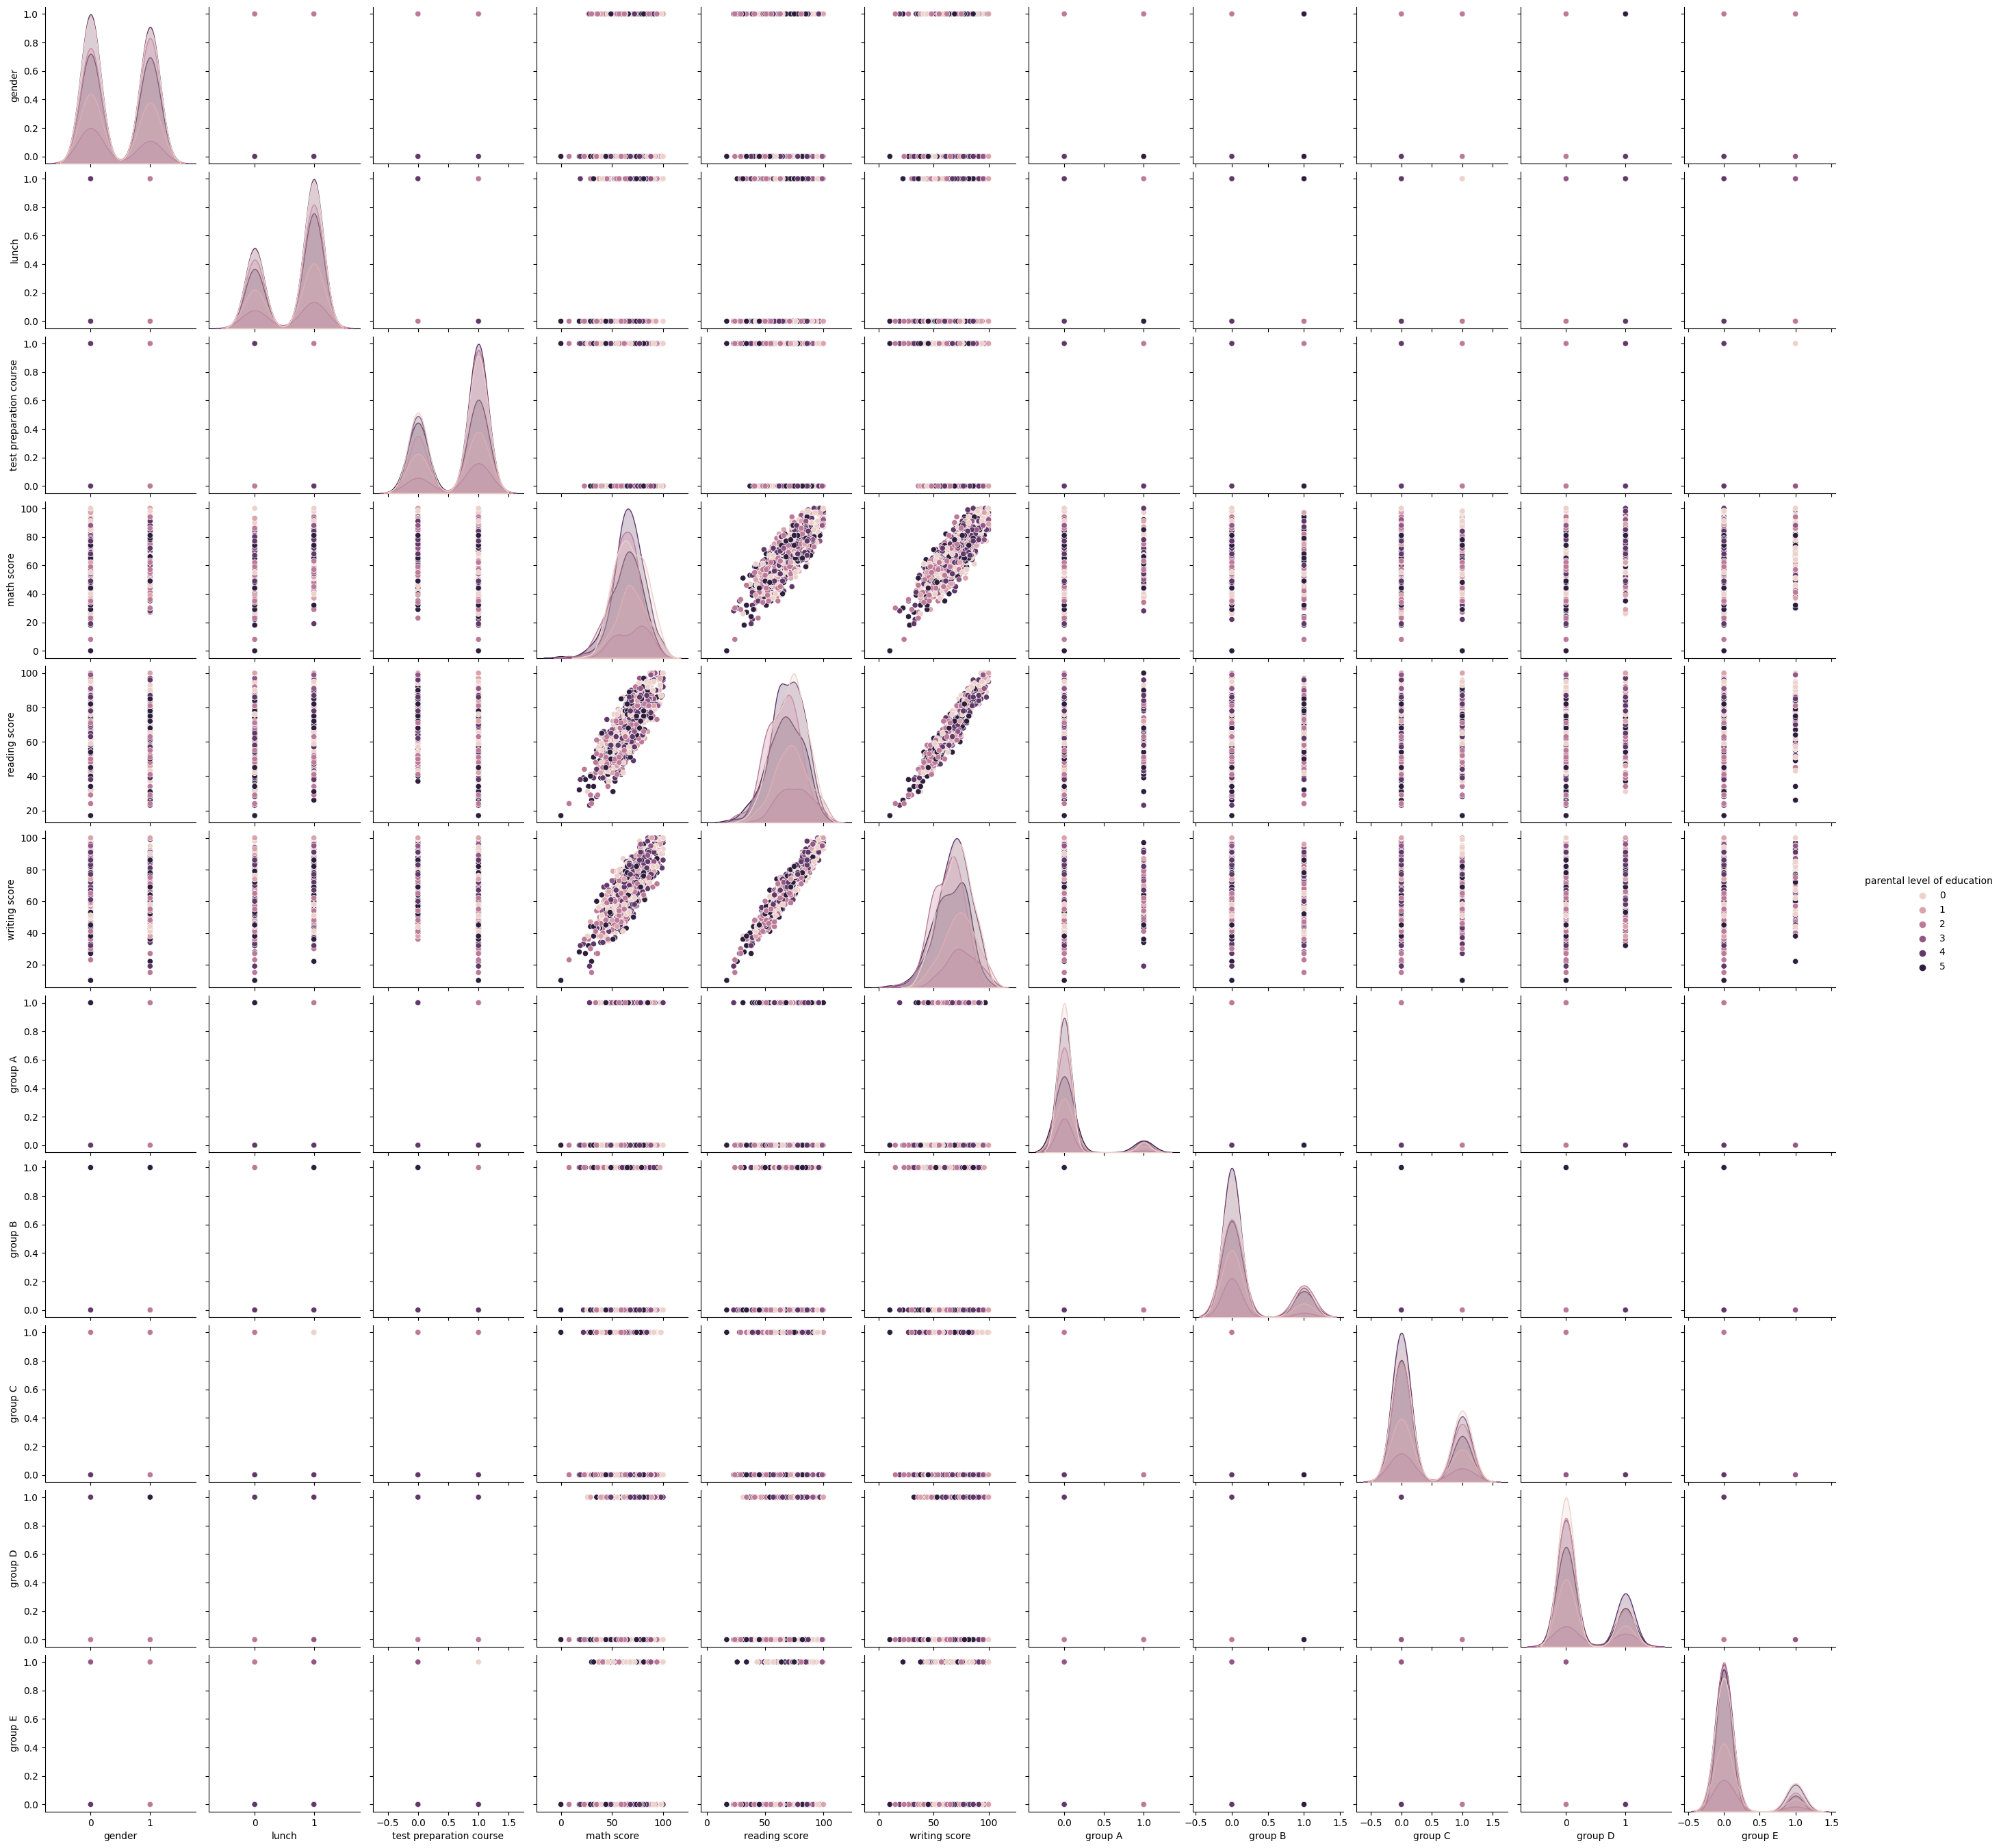

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(train, hue='parental level of education')
plt.show()

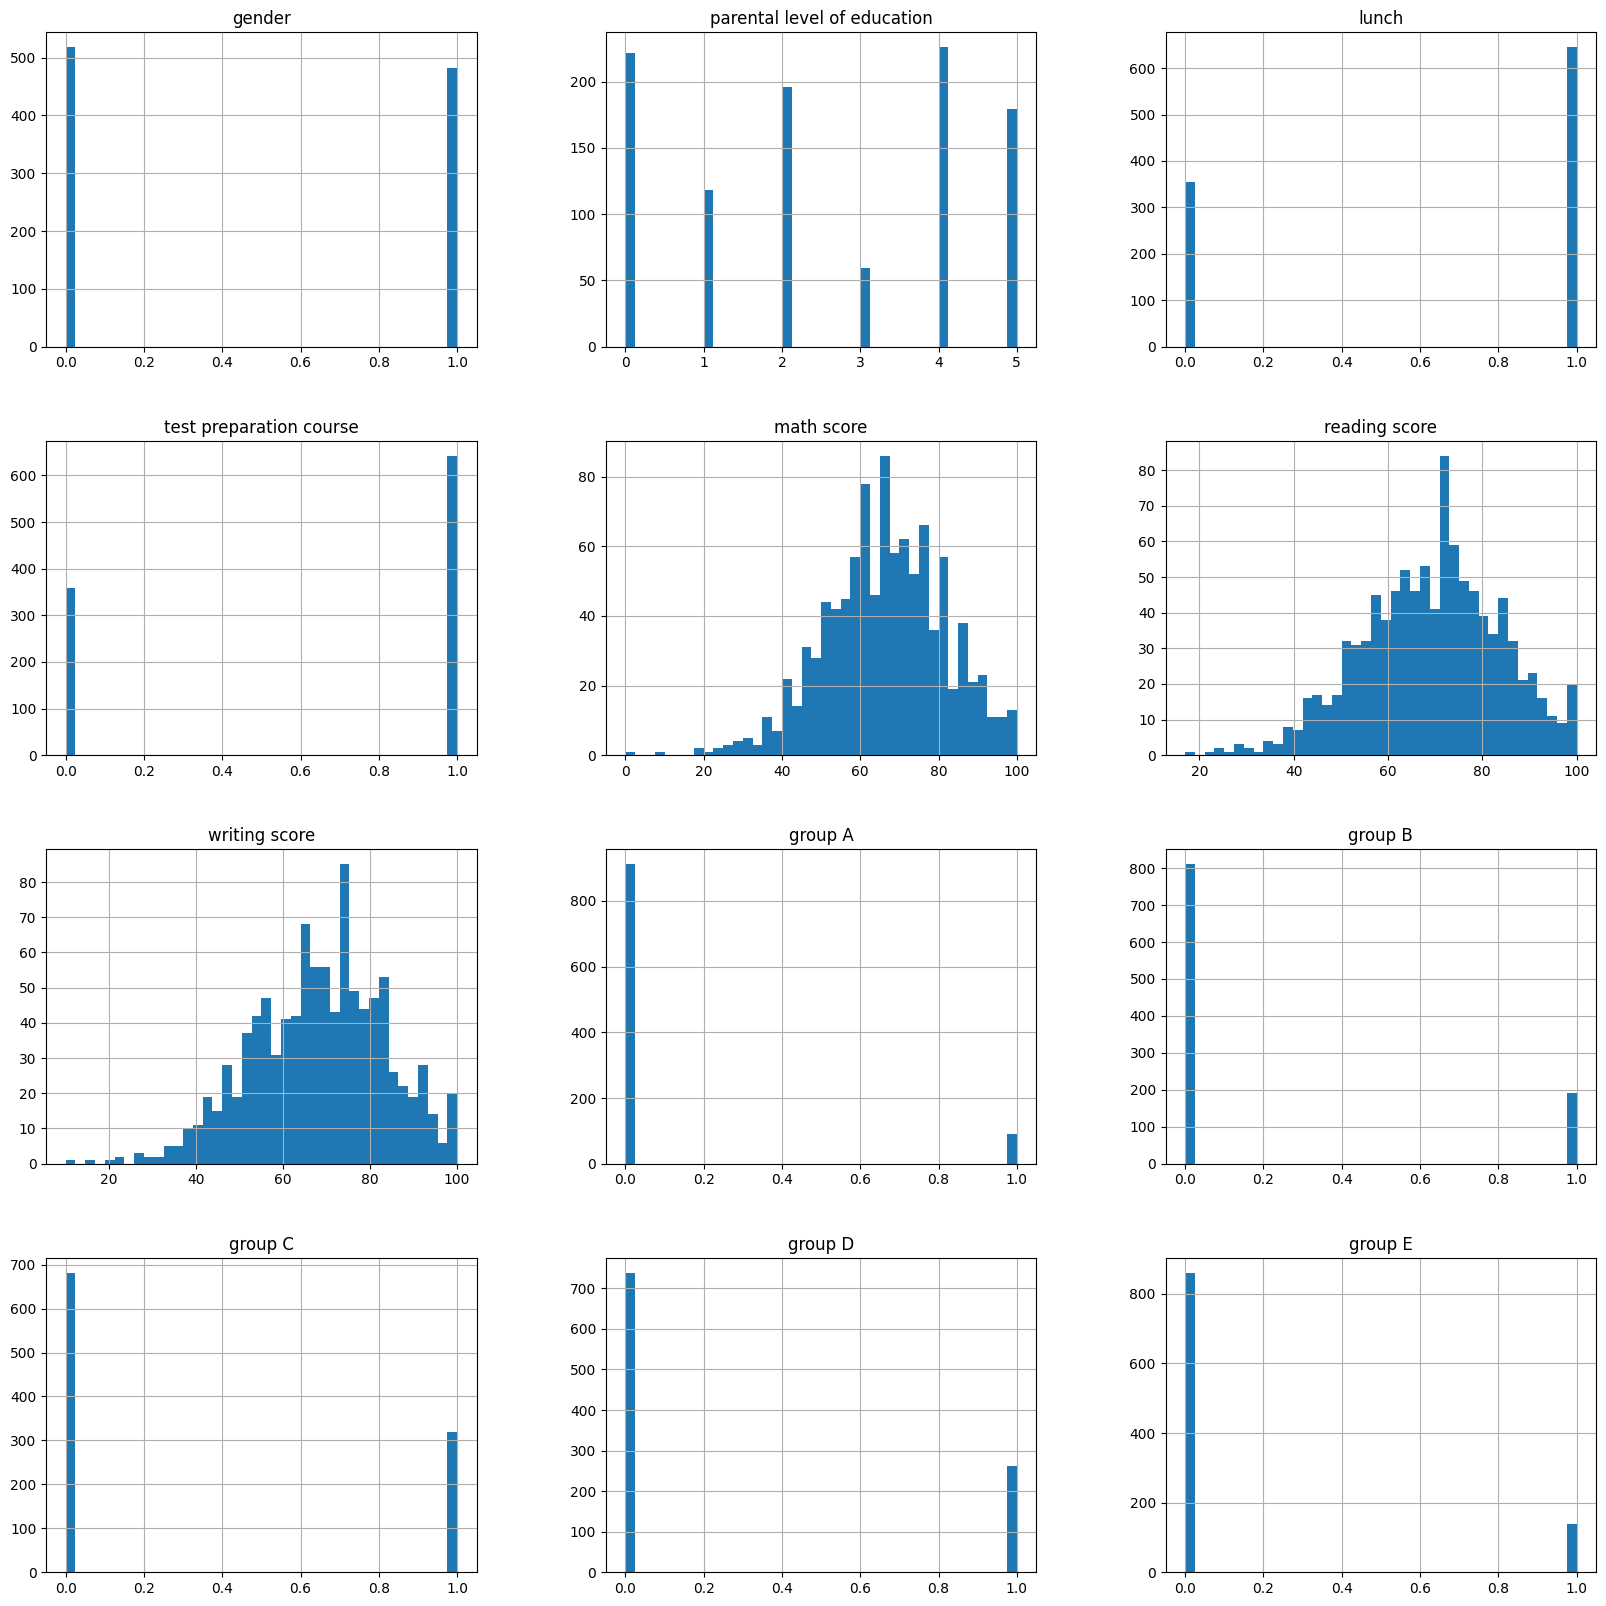

In [35]:
import matplotlib.pyplot as plt
train.hist(bins=40, figsize=(20,20))
plt.show()
#PODEMOS VER QUE LA GRÁFICA DEL PRECIO, TIENE UNA DISTRIBUCIÓN QUE DETALLAREMOS MÁS ADELANTE

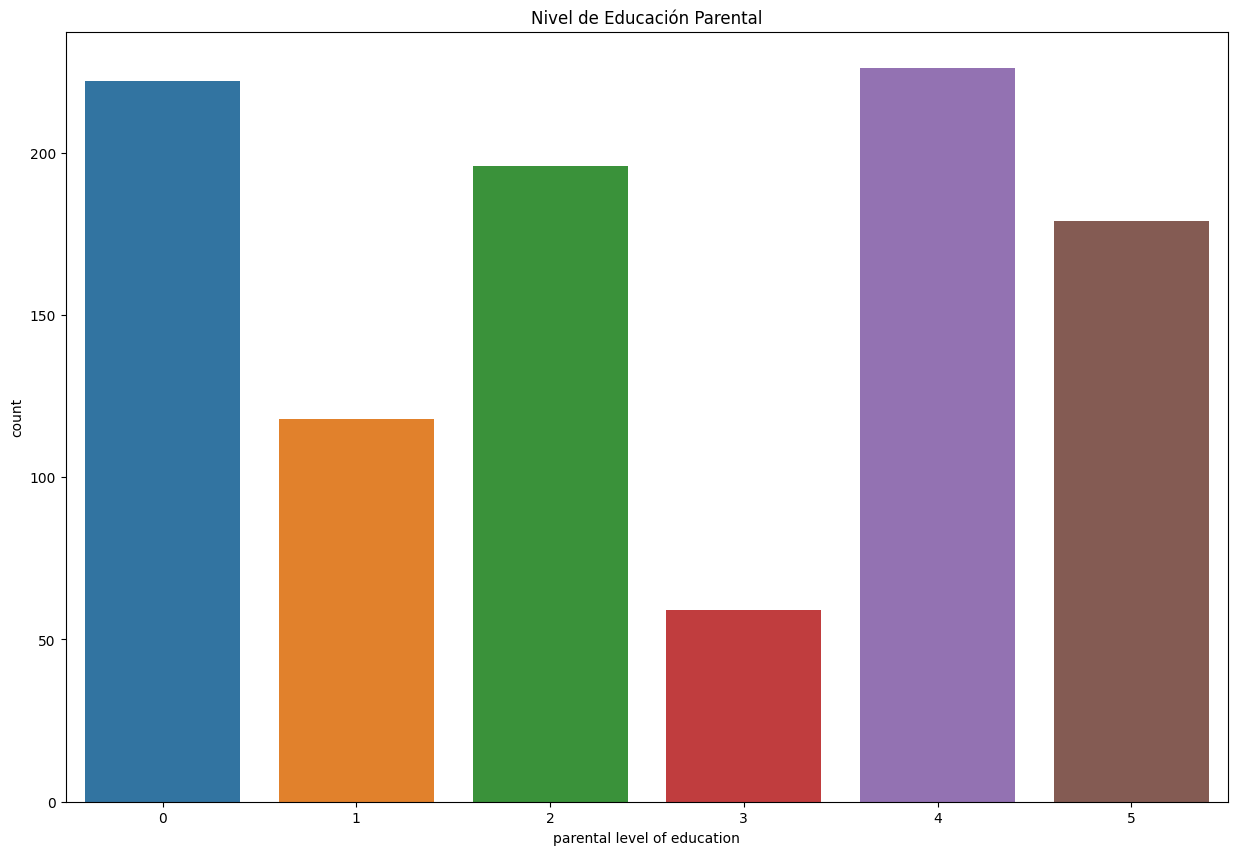

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="parental level of education",data=train)
ax.set_title("Nivel de Educación Parental")
plt.show()



#GRAFICAREMOS A DETALLE LA GRAFICA DEL PRECIO PARA VER SU DISTRIBUCION Y QUE ES ASIMETRICA POSITIVA. 

In [37]:
train.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'group A', 'group B', 'group C', 'group D', 'group E'],
      dtype='object')

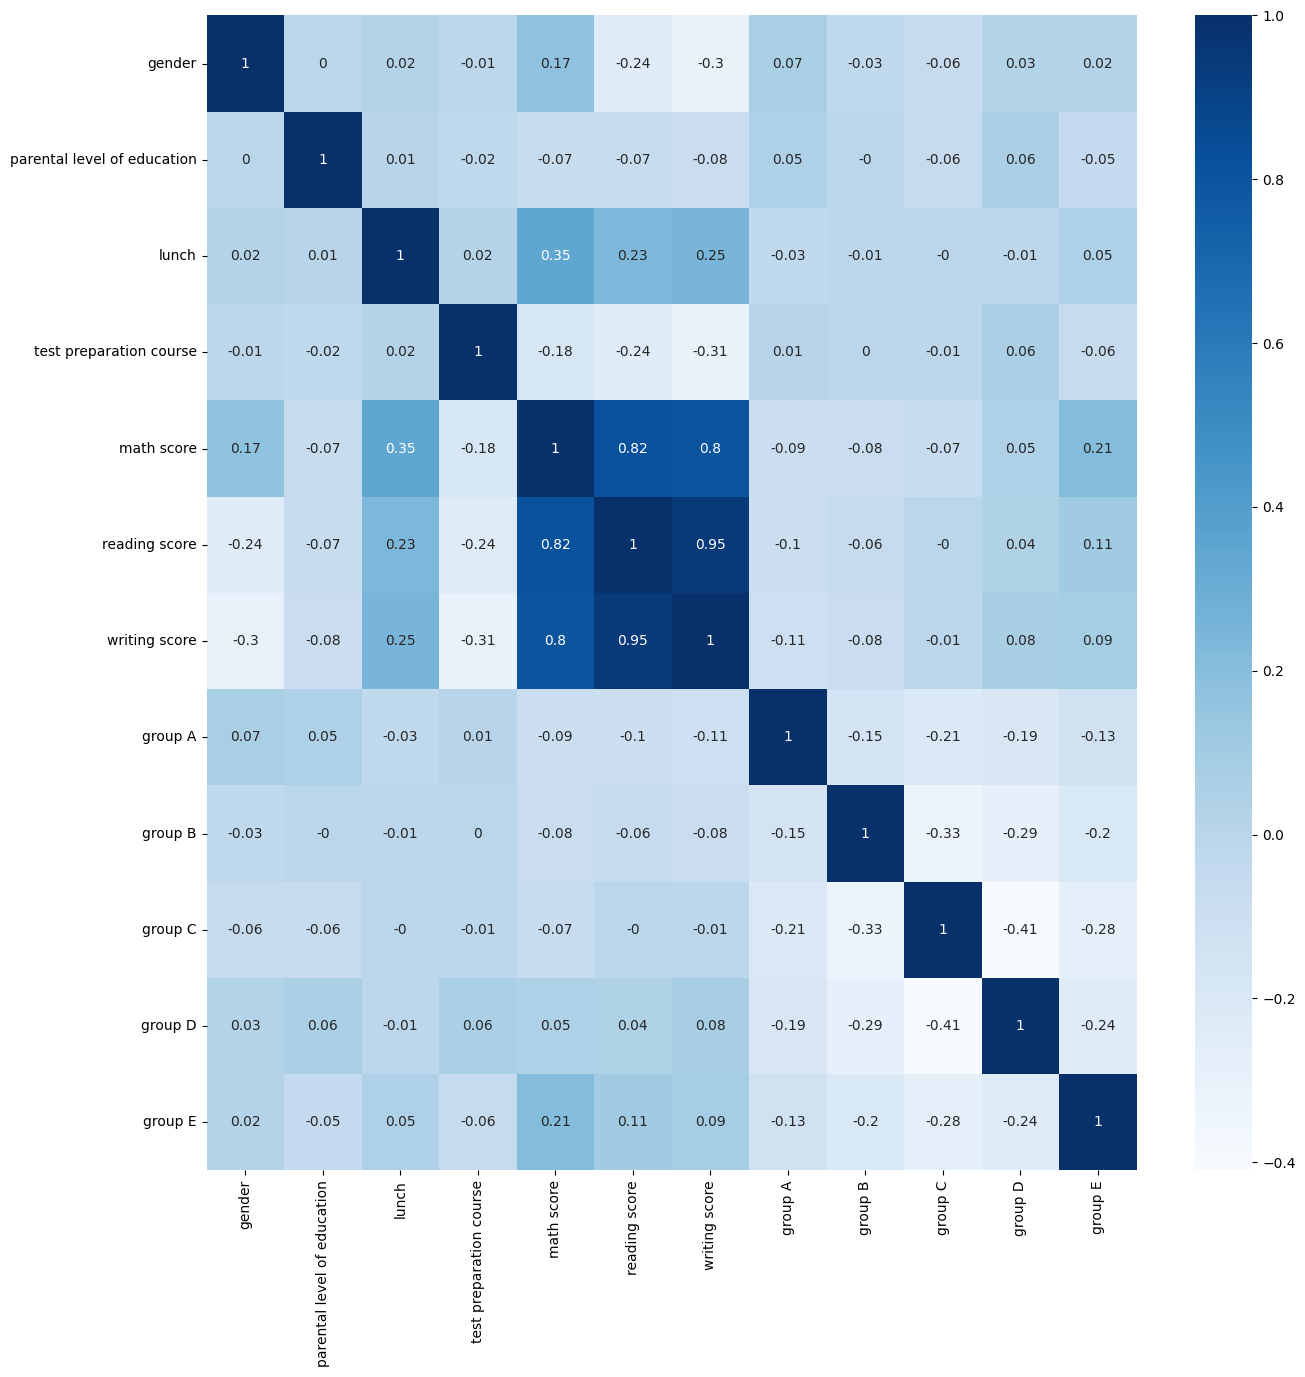

In [48]:

import seaborn as sns
correlacion = train
correlacion=correlacion.corr().round(2)
#correlacion = correlacion.loc[:,['parental level of education']]
#correlacion = correlacion.sort_values(by='parental level of education', ascending=False)


fig, ax = plt.subplots(figsize=(15,15))

ax=sns.heatmap(correlacion, annot=True,cmap="Blues")

#EN ESTA GRAFICA VEREMOS LA CORRELACION DE LAS VARIABLES CON LA VARIABLE OBJETIVO. 

In [39]:
train.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'group A', 'group B', 'group C', 'group D', 'group E'],
      dtype='object')

#### ESTABLECEMOS LAS VARIABLES

In [40]:
#ELIMINAMOS LAS VARIABLES QUE NO USAREMOS
#train=train.drop("Id",axis=1)

#ESTABLECEMOS LA VARIABLE OBJETIVO Y LAS VARIABLES DEPENDIENTES
y=train["math score"]
X=train.drop("math score", axis=1)


## **ANÁLISIS DE SELECCIÓN DE CARACTERISTICAS**

#### **SELECCIONANDO VARIABLES POR CORRELACIÓN**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#SE DESCARTA VARIABLES SP Y AÑO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LogisticRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
ACC_CORRELA = np.sqrt(accuracy_score(y_test, y_pred))

print("ACURACCY DESPUES DE LA SELECCIÓN POR CORRELACIÓN: "+str(ACC_CORRELA))

ACURACCY DESPUES DE LA SELECCIÓN POR CORRELACIÓN: 0.1414213562373095


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **SELECCIONANDO VARIABLES CON RFE**

In [42]:

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = LogisticRegression()

Lista_Accuracy = []
Posicion_Accuracy = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MEJOR ACCURACY
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe = rfe.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,test_size=0.3,random_state=42)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    Lista_Accuracy.append(accuracy)
    print("Con "+str(i+1)+" variables se obtiene un Accuracy de "+str(accuracy))
    extra = i+1
    Posicion_Accuracy.append(extra)

posicion=pd.Series(Lista_Accuracy).idxmin()
ACURACCY_RFE=max(Lista_Accuracy)
cant_var_usar=Posicion_Accuracy[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X, y)
cabeceras_nuevas=X.columns[(rfe.get_support())]


X=X[cabeceras_nuevas]

print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)
print("ACURACCY DESPUES DEL RFE: "+str(ACURACCY_RFE))
print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)

c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 1 variables se obtiene un Accuracy de 0.03


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 2 variables se obtiene un Accuracy de 0.03


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 3 variables se obtiene un Accuracy de 0.03


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 4 variables se obtiene un Accuracy de 0.02666666666666667


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 5 variables se obtiene un Accuracy de 0.03


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 6 variables se obtiene un Accuracy de 0.02666666666666667


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 7 variables se obtiene un Accuracy de 0.016666666666666666


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 8 variables se obtiene un Accuracy de 0.016666666666666666


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 9 variables se obtiene un Accuracy de 0.02666666666666667


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 10 variables se obtiene un Accuracy de 0.023333333333333334


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Con 11 variables se obtiene un Accuracy de 0.02


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE:  7
ACURACCY DESPUES DEL RFE: 0.03
VARIABLES SELECCIONADAS POR RFE:  Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score', 'group C'],
      dtype='object')


c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **ITERANDO TODOS LOS MODELOS QUE SE ADAPTAN A NUESTRO PROBLEMA PARA HALLAR EL MEJOR**

In [43]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR
from sklearn.model_selection import cross_val_predict
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

modelos = {
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "GaussianNB":GaussianNB(),
    "BernoulliNB":BernoulliNB(),
    "MultinomialNB":MultinomialNB(),
    "MLPClassifier":MLPClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":xgb.XGBClassifier(),
    "LGBMClassifier":lgb.LGBMClassifier()
}


#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(accuracy_score(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'ACCURACY'}).sort_values(by='ACCURACY',ascending=False)
    
print(df_resultados)

ACCURACY_TOPMODELO=df_resultados["ACCURACY"].max()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("ACCURACY")
df_resultados=df_resultados.iloc[0,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(ACCURACY_TOPMODELO))

ModuleNotFoundError: No module named 'xgboost'

#### **REALIZAMOS LA VALIDACIÓN DEL MODELO**

In [ ]:
#CREAREMOS EL MODELO GANADOR
modelo=modelos[df_resultados]

#PROCEDEREMOS A REALIZAR LA VALIDACIÓN CRUZADA PARA COMPARAR LOS RMSE
prediccion = cross_val_predict(modelo, X, y, cv=3)
ACCURACY_TEST = np.sqrt(accuracy_score(y, prediccion))

#VEMOS QUE LA DIFERENCIA DE RMSE NO ES TAN GRANDE, LO QUE INDICA QUE NUESTRO MODELO ESTÁ EN BUEN CAMINO
APRUEBA=ACCURACY_TOPMODELO-ACCURACY_TEST
print("El RMSE DEL TRAIN ES: "+str(ACCURACY_TOPMODELO))
print("El RMSE DEL TEST ES: "+str(ACCURACY_TEST))
print("LA DIFERENCIA DE AMBOS ES: "+str(APRUEBA))



El RMSE DEL TRAIN ES: 1.0
El RMSE DEL TEST ES: 0.976387901058454
LA DIFERENCIA DE AMBOS ES: 0.023612098941546034


#### **USAMOS EL MODELO GANADOR, LO ENTRENAMOS Y PROCEDEMOS A PREDECIR LOS VALORES DESEADOS**

In [ ]:
modelo.fit(X, y)
y_pred=modelo.predict(BASE)


NameError: name 'BASE' is not defined